In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

In [2]:
games_prediction = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games_prediction

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40481,True,13.99,13.99,0.000000,True,1,1,1,0,0,0,0,0,0,0,0,0,0,1
40524,True,2.99,2.99,0.000000,False,1,1,0,0,0,0,0,0,0,0,0,0,0,1
40598,True,14.99,14.99,0.000000,False,0,0,0,0,0,0,1,0,0,0,1,0,0,0
40611,True,7.99,7.99,0.000000,False,0,1,0,0,0,0,0,0,0,0,0,0,0,1


# Data Resampling

## Balanced Resampling

In [3]:
# Upsample Bad to match Good
from sklearn.utils import resample

gamesBad = games_prediction[games_prediction.recommend == False]
gamesGood = games_prediction[games_prediction.recommend == True]
 
# Upsample the Bad samples
gamesBad = resample(gamesBad, 
                        replace=True,                     # sample with replacement
                        n_samples=gamesGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
games_prediction_balanced = pd.concat([gamesGood, gamesBad])
 
# Check the ratio of the classes
games_prediction_balanced['recommend'].value_counts()

True     7550
False    7550
Name: recommend, dtype: int64

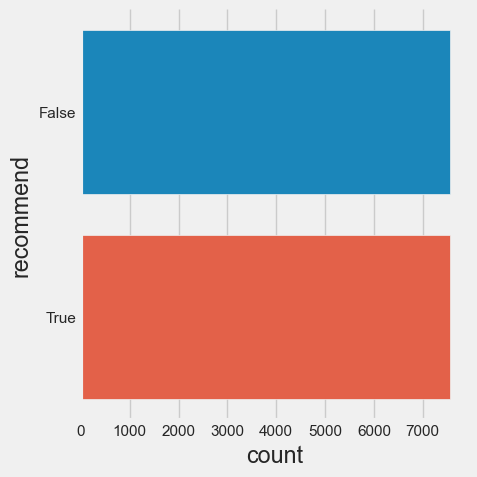

In [4]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'recommend', data = games_prediction_balanced, kind = "count")

In [5]:
games_prediction_balanced.to_csv('datasets/games-prediction-balanced-resampling.csv')

## Oversampling

In [6]:
# Import essential Oversampling module
from imblearn.over_sampling import RandomOverSampler

In [7]:
# Define oversampling strategy (creates 5:4 ratio)
over_smp = RandomOverSampler(sampling_strategy=0.8, random_state=20)

# Define X and y
X = games_prediction.drop('recommend', axis = 1)
y = games_prediction['recommend']

# Fit and apply the transform
X_oversampled, y_oversampled = over_smp.fit_resample(X, y)

In [8]:
print("Good vs Bad Games Proportion (After oversampling)")
print(y_oversampled.value_counts()[1], ':', y_oversampled.value_counts()[0])

Good vs Bad Games Proportion (After oversampling)
7550 : 6040


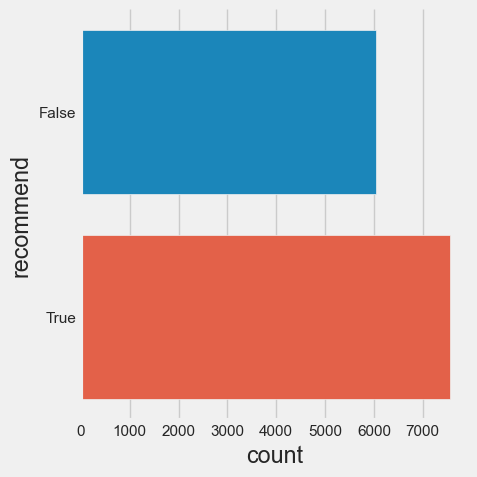

In [9]:
# Combine the two classes back after upsampling
games_prediction_oversampling = pd.concat([X_oversampled, pd.DataFrame(y_oversampled)], axis = 1)
 
# Quick plot to check the balanced classes visually
sb.catplot(y = 'recommend', data = games_prediction_oversampling, kind = "count")

In [10]:
games_prediction_oversampling.to_csv('datasets/games-prediction-over-resampling.csv')

## Visualization of resampled data

In [11]:
games_balanced_resampled = pd.read_csv('datasets/games-prediction-balanced-resampling.csv',index_col= 0)
games_over_resampled = pd.read_csv('datasets/games-prediction-over-resampling.csv',index_col= 0)
games_original_ratio = pd.read_csv('datasets/games-prediction-resampling.csv',index_col=0)



Text(0.5, 0, 'Recommend - Balanced sampled')

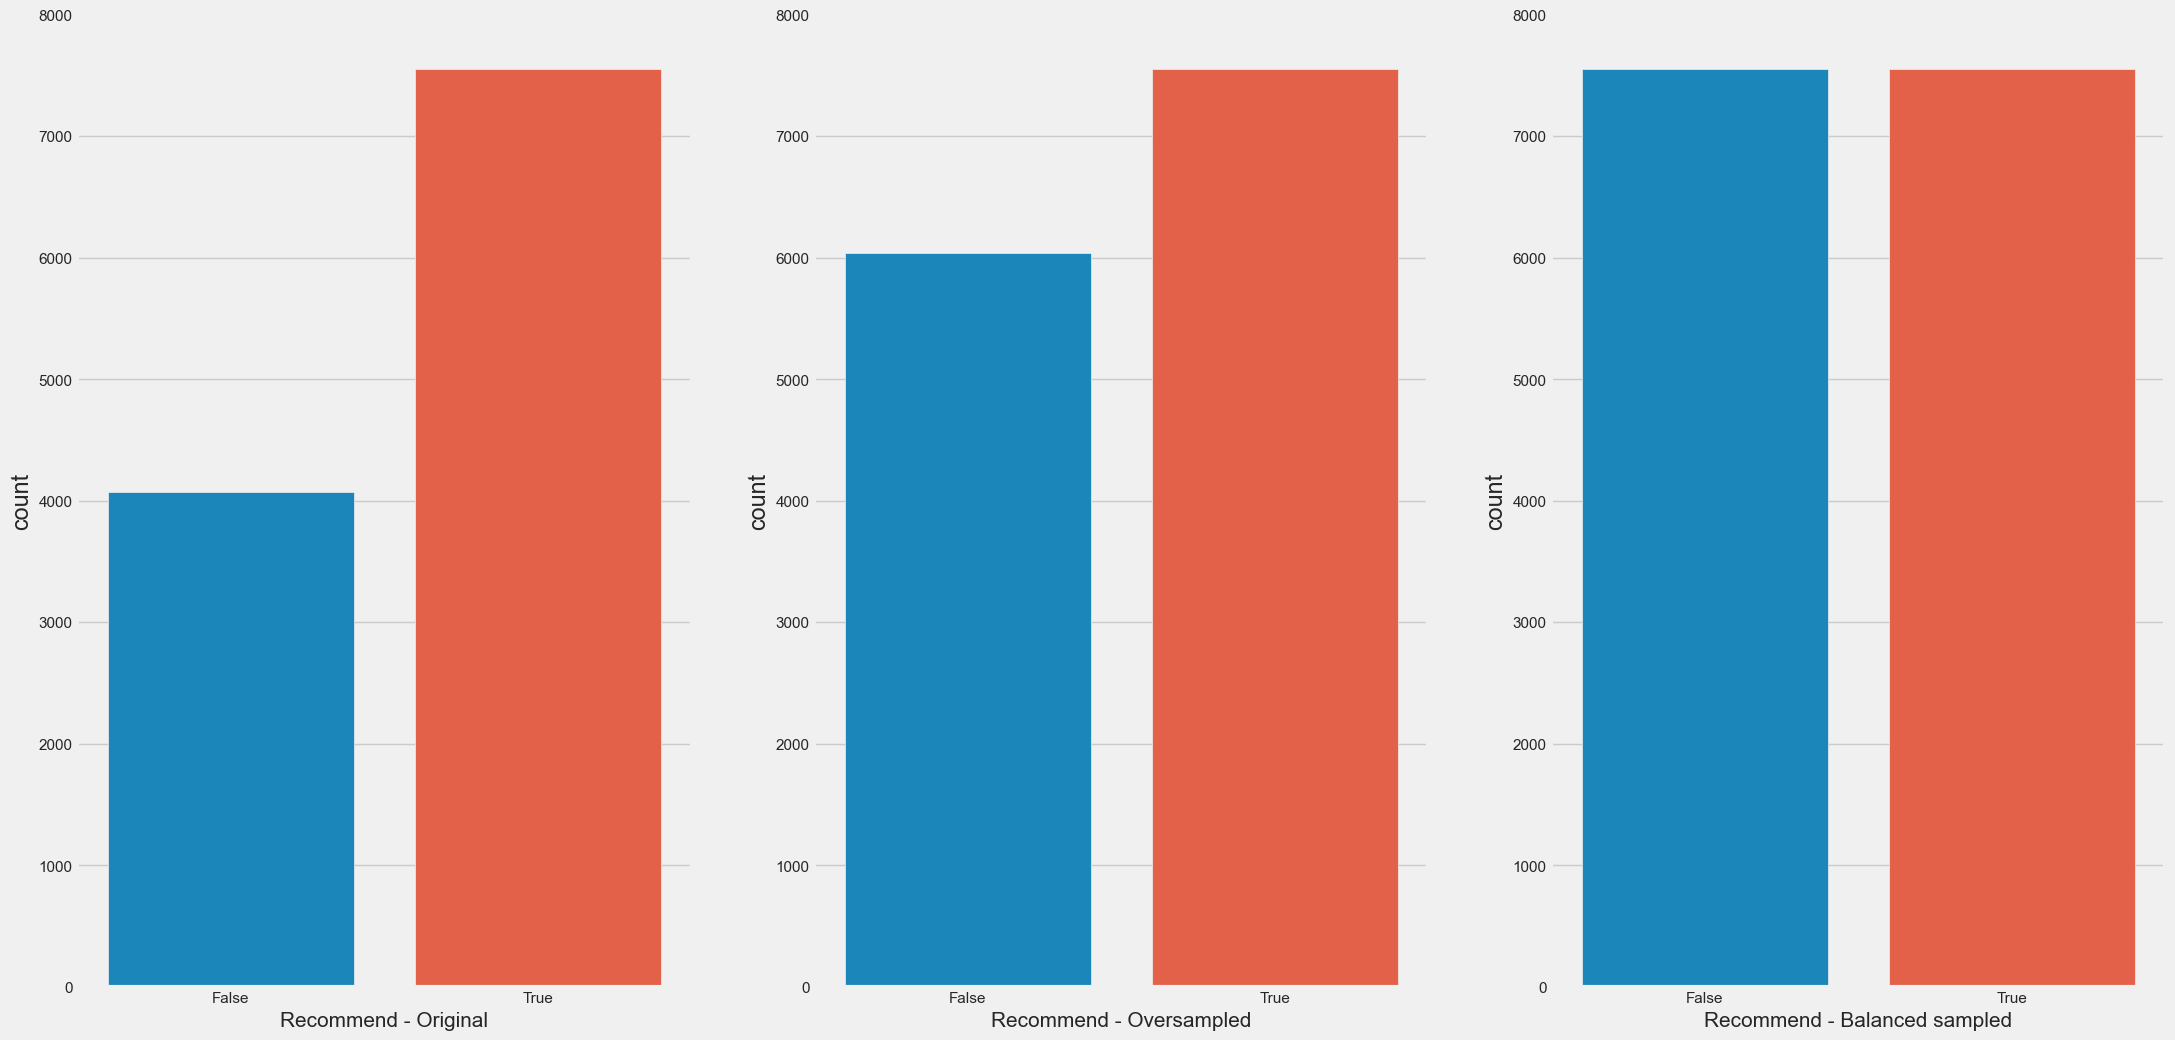

In [12]:
fig, axes =plt.subplots(1,3,figsize=(24,12))
plt.setp(axes,ylim=(0,8000))

sb.countplot(x=games_original_ratio['recommend'], ax=axes[0])
ax = axes[0]
ax.set_xlabel("Recommend - Original",fontsize=15)

sb.countplot(x=games_over_resampled['recommend'], ax=axes[1])
ax = axes[1]
ax.set_xlabel("Recommend - Oversampled",fontsize=15)

sb.countplot(x=games_balanced_resampled['recommend'], ax=axes[2])
ax = axes[2]
ax.set_xlabel("Recommend - Balanced sampled",fontsize=15)


